In [1]:
import pymysql
# import pymongo
# from pymongo import MongoClient
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn import datasets
import scipy.cluster.hierarchy as hac

import csv
import json
import pymysql

import pandas as pd
from datetime import datetime
# import seaborn as sb


In [24]:
db_query= "SELECT c.cus_fname AS FName, "\
"c.cus_lname AS LName, c.cus_city AS City, c.cus_dob AS DOB, p.pla_name AS Platform, "\
"it.itm_title AS Title, from_unixtime(i.inv_time) AS Date , NULL AS Decade, NULL AS Year, "\
"pr.prc_used AS used, pr.prc_new AS new, ii.ini_newused AS SoldNew, y.yer_year As YearRelease "\
"FROM rfu.invoices AS i "\
"JOIN rfu.customers AS c "\
" ON i.inv_customerID=c.cus_customerID "\
"JOIN rfu.invoice_items AS ii "\
" ON ii.ini_invoiceID = i.inv_invoiceID "\
"JOIN rfu.items AS it "\
" ON ii.ini_itemID = it.itm_itemID "\
"JOIN rfu.platforms AS p "\
" ON it.itm_platformID= p.pla_platformID "\
"JOIN rfu.prices AS pr "\
" ON it.itm_itemID = pr.prc_itemID "\
"JOIN rfu.years AS y "\
" ON it.itm_yearID = y.yer_yearID;"
# 18 is new, 19 is used 


In [25]:
conn = pymysql.connect(host='localhost', port=3306, user='root', 
                       passwd='imkingoftheworld', db='rfu')
funun=pd.read_sql(db_query, conn, parse_dates = ["Date", "DOB"] )


print funun.sample(n=5)
# pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)[source]

             FName        LName        City        DOB         Platform  \
469990  Mary Ellen      Poulsen  Smithfield        NaT        X-Box 360   
445850      Colter  Christensen  Bear River 1986-05-02        X-Box 360   
60323       Shelly         Tive       Logan 1973-08-13  Gameboy Advance   
325871        Zach      Saltern       Logan 1992-08-29              PSP   
298668      Andrew      Vanover       Logan 1979-07-10    Playstation 3   

                                        Title                Date Decade  \
469990             Viva Pinata: Party Animals 2009-01-22 19:35:38   None   
445850                               Quake 4* 2014-08-08 17:35:34   None   
60323      Yu-Gi-Oh! The Eternal Duelist Soul 2004-09-20 11:56:13   None   
325871                  Yu Gi Oh! Tag Force 4 2011-07-04 12:52:48   None   
298668  Prince of Persia: The Forgotten Sands 2012-06-05 20:25:25   None   

        Year   used    new  SoldNew YearRelease  
469990  None  14.99  19.99       19       

In [20]:
# print funun.sample(n=5)
print funun['DOB'][360484].weekday()
print type(funun['DOB'][360484].time())

4
<type 'datetime.time'>


In [26]:
# funun['DOB']=pd.to_datetime(funun['DOB']), format='%d-%m-%Y %H:%M:%S'



# def is_in_range(x):
#    if x['Date'] > '28-02-2010 00:00:00' and x['Date'] < '31-08-2014 00:00:00':
#        return 1
#    else:
#        return 0

# data.groupby(df['date'].map(is_in_range))
print type(funun['DOB'][360484])
print dir(funun['DOB'][360484])
print funun['DOB'][360484].weekday()
# print funun['DOB'][0]

def group_by_decade(x):

    if isinstance(x['DOB'], pd.tslib.Timestamp):
#         print x['DOB'].year
        return (x['DOB'].year // 10) * 10
    else:
        return None
    
def group_by_year(x):
    if isinstance(x['DOB'], pd.tslib.Timestamp):
#         print x['DOB'].year
        return x['DOB'].year
    else:
        return None
    
def day_of_week(x):
    if isinstance(x['DOB'], pd.tslib.Timestamp):
#         print x['DOB'].year
        return x['DOB'].weekday()
    else:
        return None
def get_time(x):
    if isinstance(x['Date'], pd.tslib.Timestamp):
#         print x['DOB'].year
        return x['Date'].time()
    else:
        return None
    
def when_sold(x):
    if x["SoldNew"]==18:
        return True
    else:
        return False
    
funun["Decade"] = funun.apply(group_by_decade, axis = 1)
funun["Year"] = funun.apply(group_by_year, axis =1)
funun["DayOfWeek"]= funun.apply(day_of_week, axis = 1)
# # 18 is new, 19 is used
funun['SoldNew']=funun.apply(when_sold, axis = 1)
funun["Time"]=funun.apply(get_time, axis =1)




<class 'pandas.tslib.Timestamp'>
['__add__', '__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__qualname__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_date_repr', '_get_field', '_get_start_end_field', '_has_time_component', '_repr_base', '_round', '_time_repr', 'asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'freq', 'freqstr', 'fromordinal', 'fromtimestamp', 'hour', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'nanosecond', 'normalize', 'now', 'offset', 'quarter'

In [27]:
funun.to_csv("test.csv")
funun.sample(n=5)


,FName,LName,City,DOB,Platform,Title,Date,Decade,Year,used,new,SoldNew,YearRelease,DayOfWeek,Time
210941,Terry,Graham,logan,1982-05-13,Playstation 2,NHL 2004,2014-05-12 21:02:01,1980.0,1982.0,9.99,14.99,False,Unknown,3.0,21:02:01
284409,Santos,jonas,,NaT,Playstation 3,Haze,2014-01-30 18:14:13,NaN,NaN,14.99,19.99,False,Unknown,NaN,18:14:13
146123,Hunter,Gines,Woodland,1995-08-10,Nintendo DS,Pokemon Soul Silver Version(game only)*,2015-03-20 18:37:02,1990.0,1995.0,44.99,49.99,False,Unknown,3.0,18:37:02
404828,DJ,Cordell,,NaT,X-box,SSX 3,2017-01-11 18:36:32,NaN,NaN,14.99,19.99,False,2003,NaN,18:36:32
354668,Ada,Knight,,NaT,Super Nintendo,Controller - Performance Super Pad,2015-02-11 12:35:30,NaN,NaN,7.99,9.99,True,Unknown,NaN,12:35:30


In [66]:
platform=funun.groupby(["Platform", "Year"]).size()
# funun.plot(kind = 'scatter',"Date","")
# print platform
platform = platform.reset_index(name='count')


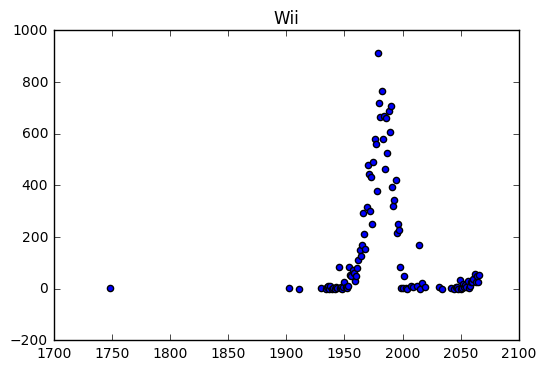

In [68]:


plat1= platform[platform["Platform"]=="WII"]
# print plat1
plt.scatter(plat1["Year"], plat1["count"])
plt.title ("Wii")


In [37]:
# funun.plot.scatter('DOB','used')
filtered = funun.dropna()

p1 = filtered[filtered["Platform"] == "Super Nintendo"]
p1.sample(n=5)



,FName,LName,City,DOB,Platform,Title,Date,Decade,Year,used,new,ini_newused
348964,Richard,Andrews,Logan,1980-08-05,Super Nintendo,Super Caesars Palace,2011-02-25 10:21:29,1980.0,1980.0,4.99,0.0,19
350430,Jolene,Tingey,North Logan,1969-04-07,Super Nintendo,Super Mario World,2007-12-29 14:40:52,1960.0,1969.0,34.99,0.0,19
353072,Andria,mares,roy,1979-10-13,Super Nintendo,Wheel of Fortune,2014-06-21 17:18:38,1970.0,1979.0,8.99,0.0,19
353170,Nick,Galloway,Logan,1983-08-29,Super Nintendo,Wing Commander:Secret Missions,2006-03-29 16:40:07,1980.0,1983.0,6.99,0.0,19
353462,Chris,Harmon,Clearfield,1983-01-05,Super Nintendo,Young Merlin,2016-02-13 19:56:25,1980.0,1983.0,12.99,0.0,19


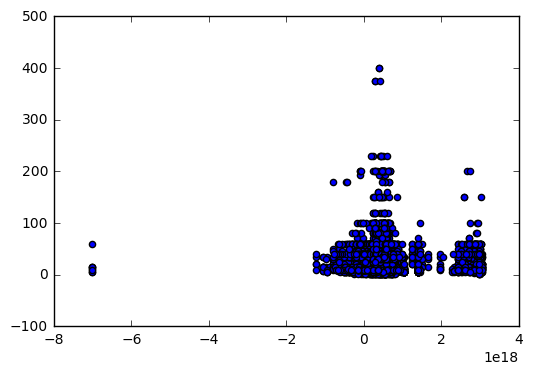

In [33]:
# plt.scatter(filtered["DOB"], filtered["used"])
plt.scatter(p1["DOB"].astype(np.int64), p1["used"])
# plt.scatter(p1["DOB"], p1["used"])

In [5]:
xnorm = data
plt.scatter(x_norm[:, 0], x_norm[:, 1])


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


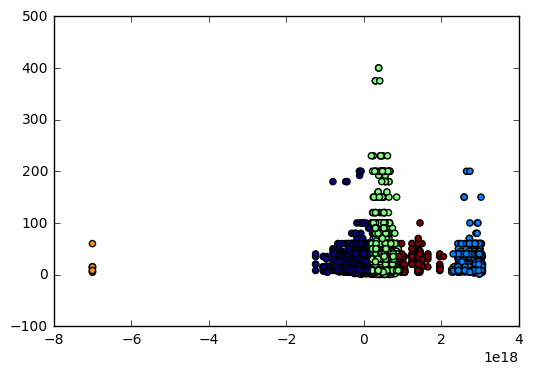

In [34]:

tester_norm=KMeans(n_clusters=5)
p1["DOB"] =p1["DOB"].astype(np.int64)
tester_norm.fit(p1[["DOB", "used"]])
labels_norm = tester_norm.labels_
plt.scatter(p1["DOB"].astype(np.int64), p1["used"], c=labels_norm.astype(np.float))